# Assignment #1 - Linear Regression

<font color="red"> <b> Due: Feb 12 (Tuesday) 11:00 pm </b> </font>

<font color="blue">Ruhani Faiheem Rahman</font>

# Introduction

The main objective for this assignment is get to know about basic linear regression algorithms like Least Square and Least Mean Square algorithm and implement the algorithm in python. Thus we can learn the inside code of ml and how ml actually works. Even though these are the basic algorithms, i think this our first step to ml. Because after this we can implement some new algorithm in ml and see how it performs.

For black friday [1] data, we first need to implement the algorithms [3] described in the lecture. Then we will use some of the features from the data set and apply LS and LMS to see how it performs.

# Data

## Description

### Introduction of data

This Black Friday [1] dataset is the record of a retail store purchase history on black friday. The data stores age, occupation, marital status, gender, product catagory, purchase amount etc. These data can be analyzed further to predict the purchase amount of a customer or customers status like age, marital status.

This data is taken from https://www.kaggle.com/mehdidag/black-friday Analytics Vidhya hosted a competetion.

### Reding the data

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
#import pdb; pdb.set_trace()
%matplotlib inline


In [4]:
df = pd.read_csv('BlackFriday.csv')
#df = df.sample(n=10000)

In [5]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


(537577, 12)

In [6]:
df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN      1422  
3                14.0                 NaN      1057  
4                 NaN                 NaN      7969

In [7]:
np.any(df.isnull())

True

In [8]:
df.describe()

User_ID    Occupation  Marital_Status  Product_Category_1  \
count  5.375770e+05  537577.00000   537577.000000       537577.000000   
mean   1.002992e+06       8.08271        0.408797            5.295546   
std    1.714393e+03       6.52412        0.491612            3.750701   
min    1.000001e+06       0.00000        0.000000            1.000000   
25%    1.001495e+06       2.00000        0.000000            1.000000   
50%    1.003031e+06       7.00000        0.000000            5.000000   
75%    1.004417e+06      14.00000        1.000000            8.000000   
max    1.006040e+06      20.00000        1.000000           18.000000   

       Product_Category_2  Product_Category_3       Purchase  
count       370591.000000       164278.000000  537577.000000  
mean             9.842144           12.669840    9333.859853  
std              5.087259            4.124341    4981.022133  
min              2.000000            3.000000     185.000000  
25%              5.000000            9.000000    5866.000000  
50%              9.000000           14.000000    8062.000000  
75%             15.000000           16.000000   12073.000000  
max             18.000000           18.000000   23961.000000

## Preliminary Observation

So, this dataset contains over 500K data entries and 12 features. Most of the values are not null. Only Product_Category_2 and Product_Category_3 has some null values. We also need to convert some String value to int value for the analysis purposes.

## Preprocessing of the data

In [9]:
product_catagorys = ['Product_Category_1','Product_Category_2','Product_Category_3']

def convertToInt(df, column_name):
    labels = df.loc[:,column_name].unique().tolist()
    maps = dict(zip(labels,range(len(labels))))
    df[column_name] = df[column_name].apply(lambda x: maps[x])
    return maps;

def fillNullToZero(df, column_name):
    df[column_name].fillna(value=0.0, inplace=True)


In [10]:
for column in df.columns.values:
    fillNullToZero(df,column)
print(df.info())
print(np.any(df.isnull()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null float64
Product_Category_3            537577 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB
None
False


No null values now.

In [11]:
# Product_ID, Age, Gender, Stay_In_Current_City_Years, City_Category
#these features need to convert in integer.

if df.dtypes['Age'] == 'object':
    age_maps = convertToInt(df,'Age')

if df.dtypes['Gender'] == 'object':
    gender_maps = convertToInt(df,'Gender')

if df.dtypes['Stay_In_Current_City_Years'] == 'object':
    stay_maps = convertToInt(df,'Stay_In_Current_City_Years')
    
if df.dtypes['City_Category'] == 'object':
    city_maps = convertToInt(df,'City_Category')

if df.dtypes['Product_ID'] == 'object':
    city_maps = convertToInt(df,'Product_ID')


In [12]:
print(df.info())
print(np.any(df.isnull()))
print(df.columns.values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null int64
Gender                        537577 non-null int64
Age                           537577 non-null int64
Occupation                    537577 non-null int64
City_Category                 537577 non-null int64
Stay_In_Current_City_Years    537577 non-null int64
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null float64
Product_Category_3            537577 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(10)
memory usage: 49.2 MB
None
False
['User_ID' 'Product_ID' 'Gender' 'Age' 'Occupation' 'City_Category'
 'Stay_In_Current_City_Years' 'Marital_Status' 'Product_Category_1'
 'Product_Category_2' 'Product_Category_3' 'Purchase']


Now every data is either integer or float. And all null data is replaced by 0. Now our data set is ready for analysis.

## Plots for Understanding or Analysis

In [13]:
def pychart(df, column_name,maps):
    sizes = df[column_name].value_counts()
    labels = []
    for key, value in sizes.items():
        labels.append(list(maps.keys())[list(maps.values()).index(key)])
    explode = [0] * len(labels)  # only "explode" the 2nd slice (i.e. 'Hogs')
    #print(explode)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    ax1.set_title(column_name + " Plot")
    plt.show()
    
def data_scatter(T, k=101):
    plt.plot(T[:k], '.')
    plt.xticks(range(0, 101, 20)[:k], range(0, 11, 2)[:k])
def data_scatter(X, T, k=101):
    plt.plot(X[:k], T[:k], '.')
    plt.xticks(range(0, k, 20)[:k], range(0, (int) (k), 1)[:k])

In [14]:
print(df.loc[:,'Age'].shape[0])

537577


(array([0.09119314, 0.        , 0.        , 0.12961244, 0.        ,
        0.        , 1.33122015, 0.        , 0.        , 0.        ,
        0.27609068, 0.        , 0.        , 0.23325651, 0.        ,
        0.        , 0.66656498, 0.        , 0.        , 0.60539544]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. , 3.3, 3.6,
        3.9, 4.2, 4.5, 4.8, 5.1, 5.4, 5.7, 6. ]),
 <a list of 20 Patch objects>)

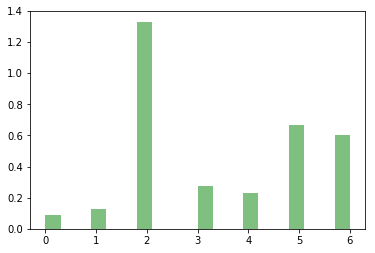

In [15]:
plt.hist(df.loc[:,'Age'], 20, density=True, facecolor='g', alpha=0.5)

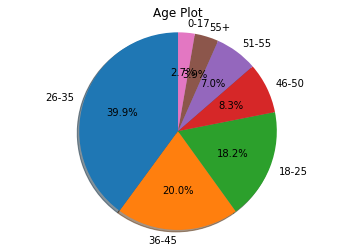

In [16]:
pychart(df,'Age',age_maps)

We can see that people buy products more offen in black friday whose age is between 18 to 45.

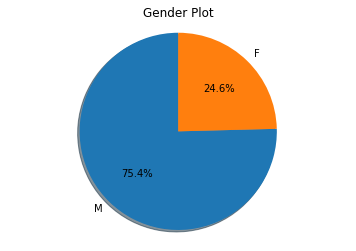

In [17]:
pychart(df,'Gender',gender_maps)

From this pychart we can see that males are more prone to attracted by the Black Friday than female. Almost 75% male buy products on black friday.

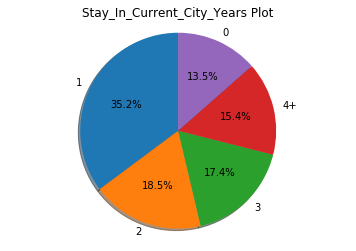

In [18]:
pychart(df,'Stay_In_Current_City_Years',stay_maps)

This is also a good observation that people who are in the city either less than 1 year or more than 2 year, don't buy stuff more often. The rate of buying products on black friday are more frequent who live in the city between 1 to 2 year. One of the reason could be they need to sttle down.

# Method

Summarize the linear models (least-squares and LMS) and explain your implementation of **class** *LinearModel*. 
The explanation of your codes should not be the comments in a code cell. 
This section should include
 - review of the linear models 
 - your implementation and description


### Review

Linear model can be defines as the dot product of two vectors. In linear regression, our focus is to generate a line which is closer to the target value. There are several techniques for linear model, Least Square and Least Mean Square.

In Least Square, our target is to get the minimum error. For this we set the first derivative to zero of the error fuction. And we calculate weight vaector, w. Here, we calculate all the data set at once and find the best fit for w.

The problem for Least Square is that calculation all the data set and find w is costly. So we choose online method in Least Mean Square and update weight vector, w at every iteration. More input comes in the weight vactor, w getting close to the apprpriate values.

### Super Classs Definition

In [39]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

### Explanation of LinearModel Class

Linear Model class is the base class for our LS and LMS. Here are some helping method like

_check_matrix() and add_ones()

This will add 1 for feature Xo. In add_ones() method _check_matrix() is called. It checks that the matrix is two dimentional or not.

There are train() and use() method which will be extended in our LS and LMS model.

### Least Squares

In [40]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        X1 = self.add_ones(X)
        self.w = np.dot(np.dot(np.linalg.inv(np.dot(X1.T, X1)), X1.T),T) 
#        print('Least Square Weight ',self.w)
#        pass  ## TODO: replace this with your codes
    
    # apply the learned model to data X
    def use(self, X):
        return np.dot(self.add_ones(X), self.w)
#        pass  ## TODO: replace this with your codes

### Explanation of LS Class

We implement tarin() and use() method here. The formula for weight vactor,
$$
\begin{align}
w &= ((X^\top X)^{-1} X^\top) t
\end{align}
$$
For this we use numpy dot and numpy linalg inv method. Like this,
$$
\begin{align}
np.dot(np.dot(np.linalg.inv(np.dot(X1.T, X1)), X1.T),T)
\end{align}
$$

And for use() method we use the dot product of w and X
$$
\begin{align}
T &= (X . W)
\end{align}
$$



### Least Mean Squares

In [41]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
        for x,t in zip(X,T):
            self.train_step(x,t)
#        print('LMS weight ', self.w)
#        pass  ## TODO: replace this with your codes
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        X1 = np.hstack((1,x))
        w = self.w if self.w is not None else np.zeros((X1.shape[0], 1))
#         print(w)
#         print(self.w)
        y = np.dot(w.T, X1)
        b = (self.alpha * np.subtract(y, t) * X1)
        w = np.subtract(w.T, b.T).T
        self.w = w
        
    
    # apply the current model to data X
    def use(self, X):
        return np.dot(self.w.T, self.add_ones(X).T).T
        

### Explanation of LMS Class

This is a online learning. So train_step() is the method used for step by step training. we use the equation from [3]

w(k+1) = w(k) - alpha * (w(k).Transpose.x(k) - t(k)).x(k)

Here alpha is the learning rate. 

First we set w = zero using this line of code 

//w = self.w if self.w is not None else np.zeros((X1.shape[0], 1))

This calculated the dot product of transpose of w and x

//y = np.dot(w.T, X1)

This is calculation alpha * (w(k).Transpose.x(k) - t(k)).

//b = (self.alpha * np.subtract(y, t) * X1)

Finally the substract of previous w to get the new w.

//w = np.subtract(w.T, b.T).T

use() mehtod is same as before.

train() method now iterates throug all the train data using train_step() method.

### Usage Examples

In [42]:
# HERE follow are for my code tests.

import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2
ls = LinearRegress()
X

array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]])

<class 'numpy.ndarray'>


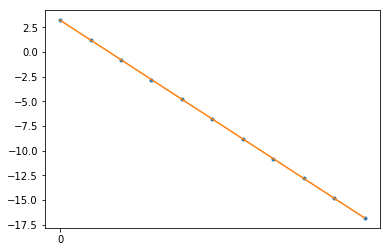

In [47]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2
print(type(X))
ls = LinearRegress()

ls.train(X, T)

data_scatter(T)
plt.plot(ls.use(X))

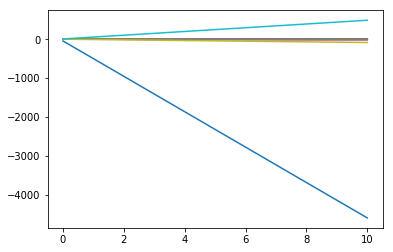

In [48]:
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

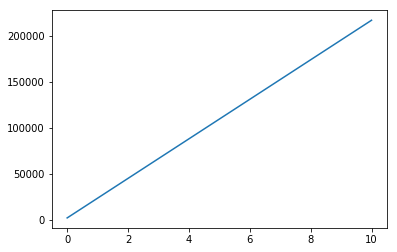

In [49]:
lms.train(X, T)
plt.plot(lms.use(X))

# Experiments

Apply LS and LMS methods on the data and discuss the results.
Please describe your experiment and related codes. You may have subsections of results and discussions here.


### Description

Now we will use the feature Age of the data set and fit LS and LMS. Age has only 6 differnt values. and many random purchase history.

### Codes and Visualization

<class 'numpy.ndarray'>
80
[[8370.12131148]
 [  -9.64098361]]


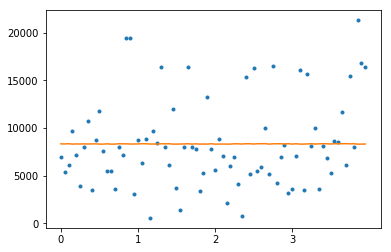

In [60]:
def data_scatter1(X, T, k=101):
    plt.plot(T[:k], '.')
    plt.xticks(range(0, k, 20)[:k], range(0, (int) (k), 1)[:k])
def data_scatter(T, k=101):
    plt.plot(T[:k], '.')
    plt.xticks(range(0, k, 20)[:k], range(0, 20, 1)[:k])
    
df = df.sample(n=100)
#print(df.info())
train=df.sample(frac=0.8,random_state=200)
test=df.drop(index=train.index)

X = train.loc[:,'Age'].values.reshape((-1, 1))
T = train.loc[:,'Purchase'].values.reshape((-1, 1))

print(type(X))
print(X.shape[0])
#print(X)
ls = LinearRegress()

ls.train(X, T)

print(ls.w)
data_scatter(T, X.shape[0])
plt.plot(ls.use(X))

[[2511.90677338]
 [2650.04330336]]


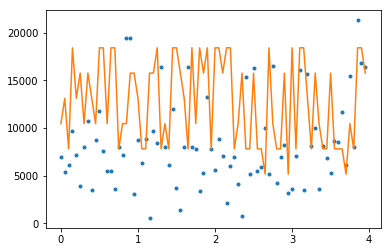

In [64]:
import IPython.display as ipd  # for display and clear_output

N = X.shape[0]
lms = LMS(0.02)
lms.train(X,T)
fig = plt.figure()
data_scatter(T)
plt.plot(lms.use(X))
print(lms.w)

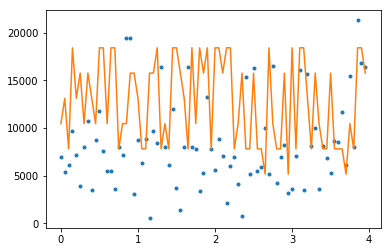

[[2511.90677338]
 [2650.04330336]]


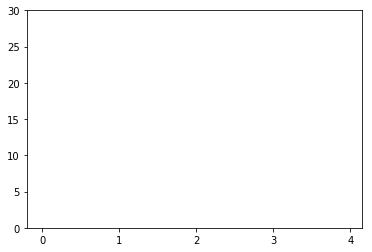

In [66]:
lms_s = LMS(0.02)
i = 0
for x, t in zip(X, T):
    i+=1
    plt.clf()
    lms_s.train_step(x,t)
    data_scatter(T)
    plt.plot(lms_s.use(X))
    plt.ylim([0,30])
    ipd.clear_output(wait=True)
    ipd.display(fig)

print(lms_s.w)

### Analysis


So, using the feature 'Age' vs 'Purchase' is not good for ls or lms. Because Traget value has disparse. But feature Age has only 6 different value. I think that's why the result is not fitted well.

In Least Square the regression line is not scatterd. It tries to fit as something to describe. But in LMS as the purchase amount and Age changes too much. So the regression line is scattered and flactuates too much.

### Using Stay_In_Current_City_Years features

<class 'numpy.ndarray'>
80
[[7324.2144337 ]
 [ 458.43093923]]


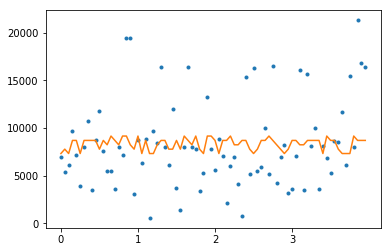

In [67]:
X = train.loc[:,'Stay_In_Current_City_Years'].values.reshape((-1, 1))
T = train.loc[:,'Purchase'].values.reshape((-1, 1))

print(type(X))
print(X.shape[0])
#print(X)
ls = LinearRegress()

ls.train(X, T)

print(ls.w)
data_scatter(T, X.shape[0])
plt.plot(ls.use(X))

### Analysis

Same for this feature also. Need to think something else.

# Conclusions

The LMS was not passed during our first try. After using transpose of the weight matrix, it worked. 

The main problem is that I did not understand the features before. I though that age will be helpful to create a regression line. But as age has only 6 different values and purchase amount varies for same age very much. That's why it did not fit a regression line and matches very poor. I need to choose better combination of Target and feature. Now its clear to me. 

# References

1. Dagdoug, M. (2018, July 25). Black Friday. Retrieved January 28, 2019, from https://www.kaggle.com/mehdidag/black-friday
2. Lee, M. (2019, Jan 9). Jupyter Notebook Viewer. Retrived February 12, 2019, from https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/wb/ForestFire.ipynb
3.  Lee, M. (2019, Jan 9). Jupyter Notebook Viewer. Retrived February 12, 2019, from https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Linear%20Model.Sol.ipynb

# Extra Credit

If you want to work more for an extra credit, place your work here for additional analysis: weight and residual analysis. 
Try to answer to the following questions: 
- what is the most and least significant features for your data.
- what are the consequences if you remove those features from the model? (Show your work!)
- produce residual plots and observe the patterns for the goodness of fit    
    
**Note: the extra credit is an additional work that needs complete programming, experiments, analysis, and writing to get one. **

# Preliminary Test

In [ ]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )
